In [131]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,accuracy_score,recall_score,precision_score,confusion_matrix,f1_score

In [132]:
df=pd.read_csv("student_performance_dataset.csv")
df.head(10)

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass
5,S417,Male,30,84.159193,77,Masters,Yes,No,61,Pass
6,S302,Male,24,89.389494,95,High School,Yes,Yes,61,Pass
7,S009,Male,31,50.683598,78,Masters,No,No,50,Fail
8,S044,Female,34,80.863186,94,PhD,No,Yes,65,Pass
9,S331,Male,27,65.496846,86,High School,Yes,No,55,Fail


In [133]:
df["Internet_Access_at_Home"].unique()

array(['Yes', 'No'], dtype=object)

In [134]:
df.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [135]:
df.duplicated().sum()

np.int64(208)

In [136]:
df.drop_duplicates(inplace=True)

In [137]:
df.shape

(500, 10)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  500 non-null    object 
 1   Gender                      500 non-null    object 
 2   Study_Hours_per_Week        500 non-null    int64  
 3   Attendance_Rate             500 non-null    float64
 4   Past_Exam_Scores            500 non-null    int64  
 5   Parental_Education_Level    500 non-null    object 
 6   Internet_Access_at_Home     500 non-null    object 
 7   Extracurricular_Activities  500 non-null    object 
 8   Final_Exam_Score            500 non-null    int64  
 9   Pass_Fail                   500 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 43.0+ KB


In [139]:
df.describe()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,500.000000,500.000000,500.000000,500.000000
mean,25.184000,75.830689,75.218000,56.378000
std,8.804384,13.969186,14.442841,6.266551
min,10.000000,50.116970,50.000000,50.000000
25%,18.000000,64.959340,62.000000,50.000000
50%,26.000000,76.752661,75.500000,55.000000
75%,33.000000,87.548861,88.000000,61.000000
max,39.000000,99.967675,100.000000,77.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x18112aa2490>,
 'caps': [<matplotlib.lines.Line2D at 0x18112aa2710>,
 'boxes': [<matplotlib.lines.Line2D at 0x18112aa2350>],
 'medians': [<matplotlib.lines.Line2D at 0x18112aa2990>],
 'fliers': [<matplotlib.lines.Line2D at 0x18112aa2ad0>],
 'means': []}

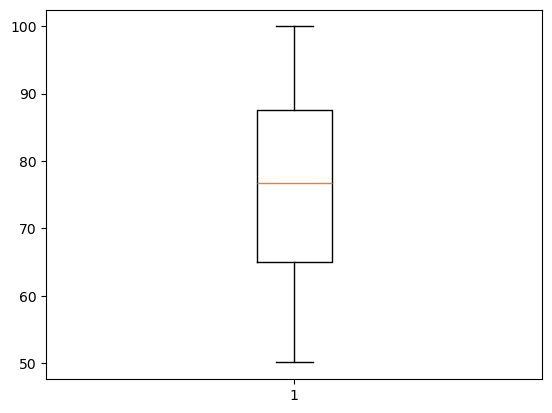

In [140]:
plt.boxplot(df["Attendance_Rate"])

{'whiskers': [<matplotlib.lines.Line2D at 0x181128f9590>,
 'caps': [<matplotlib.lines.Line2D at 0x181128f9810>,
 'boxes': [<matplotlib.lines.Line2D at 0x181128f9450>],
 'medians': [<matplotlib.lines.Line2D at 0x181128f9a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x181128f9bd0>],
 'means': []}

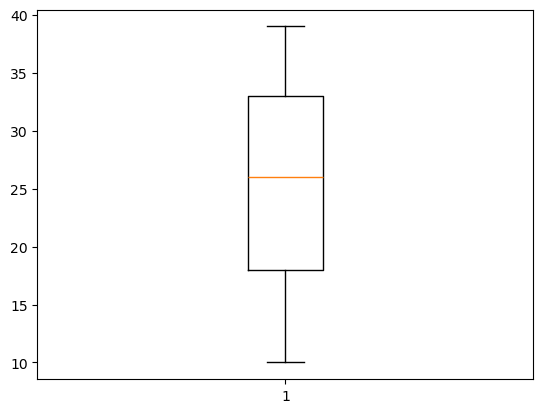

In [141]:
plt.boxplot(df["Study_Hours_per_Week"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18112960e10>,
 'caps': [<matplotlib.lines.Line2D at 0x18112961090>,
 'boxes': [<matplotlib.lines.Line2D at 0x18112960cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x18112961310>],
 'fliers': [<matplotlib.lines.Line2D at 0x18112961450>],
 'means': []}

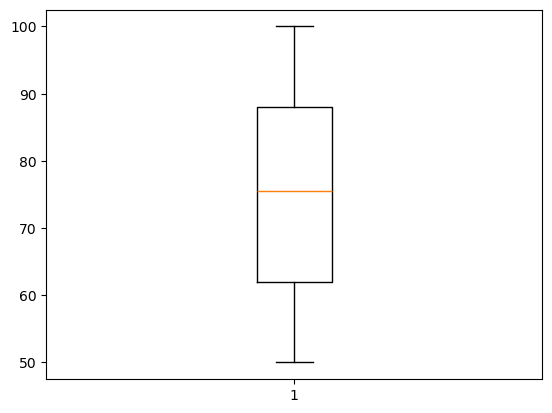

In [142]:
plt.boxplot(df["Past_Exam_Scores"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18113bd7ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x18113c1c190>,
 'boxes': [<matplotlib.lines.Line2D at 0x18113bd7d90>],
 'medians': [<matplotlib.lines.Line2D at 0x18113c1c410>],
 'fliers': [<matplotlib.lines.Line2D at 0x18113c1c550>],
 'means': []}

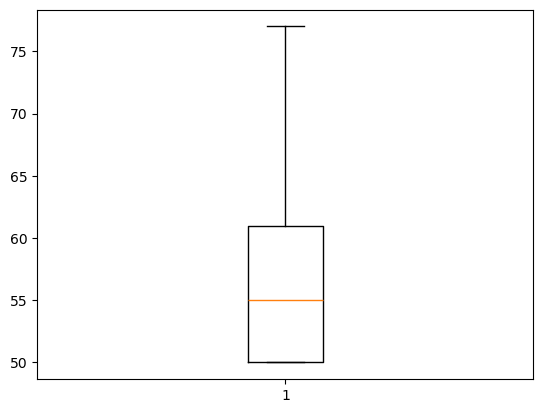

In [143]:
plt.boxplot(df["Final_Exam_Score"])

In [144]:
lab=LabelEncoder()
df["Gender"]=lab.fit_transform(df["Gender"])
df["Pass_Fail"]=lab.fit_transform(df["Pass_Fail"])
df["Parental_Education_Level"]=lab.fit_transform(df["Parental_Education_Level"])
df["Internet_Access_at_Home"]=lab.fit_transform(df["Internet_Access_at_Home"])
df["Extracurricular_Activities"]=lab.fit_transform(df["Extracurricular_Activities"])

In [145]:
df.drop(columns=["Student_ID"],inplace=True)

In [146]:
df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,1,31,68.267841,86,1,1,1,63,1
1,1,16,78.222927,73,3,0,0,50,0
2,0,21,87.525096,74,3,1,0,55,0
3,0,27,92.076483,99,0,0,0,65,1
4,0,37,98.655517,63,2,0,1,70,1


In [147]:
# check for balance
df["Pass_Fail"].value_counts(normalize=True)

Pass_Fail
0    0.708
1    0.292
Name: proportion, dtype: float64

In [148]:
#to balance we class_weight="balanced"
param_grid={
   "C":[0.01,0.1,1,10]
}
x=df.drop(columns=["Pass_Fail"])
y=df["Pass_Fail"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42)
grid=GridSearchCV(LogisticRegression(class_weight="balanced",max_iter=5000),param_grid,cv=5,scoring="f1")
grid.fit(x_train,y_train)
model=grid.best_estimator_
y_pred=model.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))
print("f1 Score:",f1_score(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))
print("r2 Score:",r2_score(y_test,y_pred))
print("confusion matrix:",confusion_matrix(y_test,y_pred))

accuracy: 0.9828571428571429
f1 Score: 0.9702970297029703
precision: 0.9607843137254902
recall: 0.98
r2 Score: 0.916
confusion matrix: [[123   2]
 [  1  49]]


In [149]:
df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,1,31,68.267841,86,1,1,1,63,1
1,1,16,78.222927,73,3,0,0,50,0
2,0,21,87.525096,74,3,1,0,55,0
3,0,27,92.076483,99,0,0,0,65,1
4,0,37,98.655517,63,2,0,1,70,1


In [152]:
y=model.predict([[1,16,78,73,3,0,0,50]])
print(y)

[0]


c:\Users\ganesh\anaconda4\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [150]:
import pickle
with open("model.sav", "wb") as f:
    pickle.dump((model), f)
with open("model.sav", "rb") as f:
    loaded_model= pickle.load(f)